## Importing the boat's CAN BUS data


In [31]:
import vaex
import numpy as np
import pandas as pd
from pandas import Timestamp
import matplotlib.pyplot as plt
from pytz import timezone
from utils.plots import plot_events_data

# %matplotlib widget

from utils import plot_styles

# plt.rcParams.update({
#     'figure.dpi' : 240,
#     'savefig.format' : 'pdf',
#     #
#     'text.usetex' : True,
#     'text.latex.preamble' : "\\usepackage{icomma}",
#     'figure.figsize' : plot_styles.get_figsize(columnwidth=455.0, unit='pt', hf_abs=),
#     #
#     "axes.labelsize": 12,
#     "font.size": 12,
#     "legend.fontsize": 12,
#     "xtick.labelsize": 12,
#     "ytick.labelsize": 12,
# })

input_path = "/home/joaoantoniocardoso/ZeniteSolar/2023/can_data/01072023/datasets/can/parsed/1s/"
input_filename = "unified_monotonic_data_1s_with_gps.hdf5"
df = vaex.open(input_path + input_filename).to_pandas_df()

# Localize the timestamp
tzinfo = timezone("America/Sao_Paulo")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["timestamp"] = df["timestamp"].dt.tz_localize(timezone("UTC"))
df["timestamp"] = df["timestamp"].dt.tz_convert(tzinfo)
df["timestamp"]
df

,timestamp,MCS19__START_STAGES__SIGNATURE,MCS19__START_STAGES__MAIN_RELAY,MCS19__START_STAGES__CHARGE_RELAY,MIC19__MDE__SIGNATURE,MIC19__MDE__POSITION,MIC19__MOTOR__SIGNATURE,MIC19__MOTOR__MOTOR,MIC19__MOTOR__D,MIC19__MOTOR__I,...,MCC19_6__MEASUREMENTS__INPUT_CURRENT,MCC19_6__MEASUREMENTS__INPUT_VOLTAGE,MCC19_6__MEASUREMENTS__DT,gps_latitude,gps_longitude,gps_altitude,gps_speed,gps_heading,gps_distance,gps_timestamp
0,2023-07-02 10:48:10-03:00,200.0,0.0,0.0,240.0,4.809896,240.0,0.0,0.002451,0.002696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:48:10
1,2023-07-02 10:48:11-03:00,200.0,0.0,0.0,240.0,4.820150,240.0,0.0,0.003431,0.002451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:48:11
2,2023-07-02 10:48:12-03:00,200.0,0.0,0.0,240.0,4.818848,240.0,0.0,0.001961,0.001176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:48:12
3,2023-07-02 10:48:13-03:00,200.0,0.0,0.0,240.0,4.818115,240.0,0.0,0.004108,0.003175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:48:13
4,2023-07-02 10:48:14-03:00,200.0,0.0,0.0,240.0,4.814453,240.0,0.0,0.002657,0.000633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:48:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,2023-07-02 11:39:46-03:00,200.0,0.0,0.0,240.0,4.646973,240.0,0.0,0.001518,0.001518,...,19.203854,18.320280,0.531589,-27.610841,-48.476128,5.3,0.000000,360.000000,3.332499,2023-07-02 14:39:46
3097,2023-07-02 11:39:47-03:00,200.0,0.0,0.0,240.0,4.646381,240.0,0.0,0.001384,0.004268,...,20.484375,0.014999,0.369873,-27.610840,-48.476127,5.3,0.534849,256.374066,3.332647,2023-07-02 14:39:47
3098,2023-07-02 11:39:48-03:00,200.0,0.0,0.0,240.0,4.647978,240.0,0.0,0.002667,0.004392,...,11.443391,2.126689,0.507992,-27.610840,-48.476127,5.3,0.000000,360.000000,3.332647,2023-07-02 14:39:48
3099,2023-07-02 11:39:49-03:00,200.0,0.0,0.0,240.0,4.645833,240.0,0.0,0.005279,0.004826,...,11.525000,1.240009,0.445972,-27.610840,-48.476127,5.3,0.000000,360.000000,3.332647,2023-07-02 14:39:49


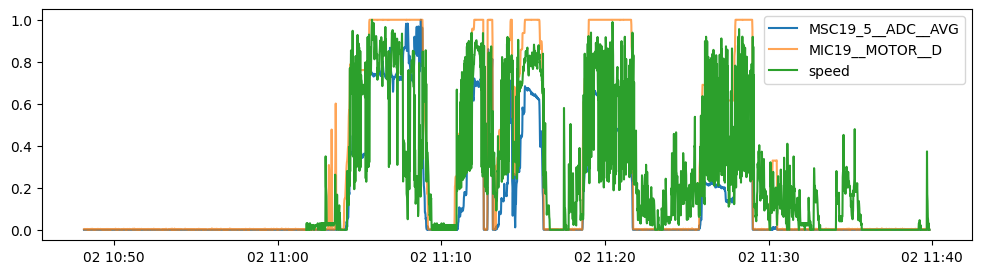

In [32]:
# Visually checking the alignment of the GPS data
plt.figure(figsize=(12, 3))
plt.plot(
    df["timestamp"],
    df["MSC19_5__ADC__AVG"] / df["MSC19_5__ADC__AVG"].max(),
    label="MSC19_5__ADC__AVG",
)
plt.plot(df["timestamp"], df["MIC19__MOTOR__D"], label="MIC19__MOTOR__D", alpha=0.7)
plt.plot(df["timestamp"], df["gps_speed"] / df["gps_speed"].max(), label="speed")
plt.legend()
plt.show()


## Transforming the boat's CAN data into boat's circuit data


In [33]:
[print(c) for c in sorted(df.columns)][0]


MAC22__CONTACTOR__RESPONSE
MAC22__CONTACTOR__SIGNATURE
MAC22__STATE__ERROR
MAC22__STATE__SIGNATURE
MAC22__STATE__STATE
MAM19__CONTACTOR__REQUEST
MAM19__CONTACTOR__SIGNATURE
MAM19__MOTOR__D
MAM19__MOTOR__I
MAM19__MOTOR__SIGNATURE
MAM19__STATE__ERROR
MAM19__STATE__SIGNATURE
MAM19__STATE__STATE
MCC19_2__MEASUREMENTS__DT
MCC19_2__MEASUREMENTS__INPUT_CURRENT
MCC19_2__MEASUREMENTS__INPUT_VOLTAGE
MCC19_2__MEASUREMENTS__OUTPUT_VOLTAGE
MCC19_2__MEASUREMENTS__SIGNATURE
MCC19_3__MEASUREMENTS__DT
MCC19_3__MEASUREMENTS__INPUT_CURRENT
MCC19_3__MEASUREMENTS__INPUT_VOLTAGE
MCC19_3__MEASUREMENTS__OUTPUT_VOLTAGE
MCC19_3__MEASUREMENTS__SIGNATURE
MCC19_4__MEASUREMENTS__DT
MCC19_4__MEASUREMENTS__INPUT_CURRENT
MCC19_4__MEASUREMENTS__INPUT_VOLTAGE
MCC19_4__MEASUREMENTS__OUTPUT_VOLTAGE
MCC19_4__MEASUREMENTS__SIGNATURE
MCC19_5__MEASUREMENTS__DT
MCC19_5__MEASUREMENTS__INPUT_CURRENT
MCC19_5__MEASUREMENTS__INPUT_VOLTAGE
MCC19_5__MEASUREMENTS__OUTPUT_VOLTAGE
MCC19_5__MEASUREMENTS__SIGNATURE
MCC19_6__MEASUREMENTS__

In [34]:
def print_only_interesting_system_variables_from_columns(df):
    for c in sorted(df.columns):
        ignored = [
            "MIN",
            "MAX",
            "STATE",
            "ERROR",
            "SIGNATURE",
            "MCS19",
            "MAB19",
            "PUMPS",
            "solcast",
            "gps",
        ]
        if any(x in c for x in ignored):
            continue
        print(tuple(c.split("__")))


print_only_interesting_system_variables_from_columns(df)


('MAC22', 'CONTACTOR', 'RESPONSE')
('MAM19', 'CONTACTOR', 'REQUEST')
('MAM19', 'MOTOR', 'D')
('MAM19', 'MOTOR', 'I')
('MCC19_2', 'MEASUREMENTS', 'DT')
('MCC19_2', 'MEASUREMENTS', 'INPUT_CURRENT')
('MCC19_2', 'MEASUREMENTS', 'INPUT_VOLTAGE')
('MCC19_2', 'MEASUREMENTS', 'OUTPUT_VOLTAGE')
('MCC19_3', 'MEASUREMENTS', 'DT')
('MCC19_3', 'MEASUREMENTS', 'INPUT_CURRENT')
('MCC19_3', 'MEASUREMENTS', 'INPUT_VOLTAGE')
('MCC19_3', 'MEASUREMENTS', 'OUTPUT_VOLTAGE')
('MCC19_4', 'MEASUREMENTS', 'DT')
('MCC19_4', 'MEASUREMENTS', 'INPUT_CURRENT')
('MCC19_4', 'MEASUREMENTS', 'INPUT_VOLTAGE')
('MCC19_4', 'MEASUREMENTS', 'OUTPUT_VOLTAGE')
('MCC19_5', 'MEASUREMENTS', 'DT')
('MCC19_5', 'MEASUREMENTS', 'INPUT_CURRENT')
('MCC19_5', 'MEASUREMENTS', 'INPUT_VOLTAGE')
('MCC19_5', 'MEASUREMENTS', 'OUTPUT_VOLTAGE')
('MCC19_6', 'MEASUREMENTS', 'DT')
('MCC19_6', 'MEASUREMENTS', 'INPUT_CURRENT')
('MCC19_6', 'MEASUREMENTS', 'INPUT_VOLTAGE')
('MCC19_6', 'MEASUREMENTS', 'OUTPUT_VOLTAGE')
('MDE22', 'STEERINGBAT_MEASUREMEN

### Selecting the data of interest


In [35]:
def col(module: str, topic: str, byte: str) -> str:
    separator = "__"
    return separator.join([module, topic, byte])


# Module name to system variable name mapper
mppts_available = [2,3,4,5,6]
number_of_battery_cells = 3
mcbs_available = []
system_data = {
    "Battery Pack Voltage": col("MCS19", "BAT", "AVG"),
    # "Battery Cell Voltage": [
    #     col(f"MSC19_{i + 1}", "ADC", "AVG") for i in range(number_of_battery_cells)
    # ], # Not installed
    "Battery Input Current": col("MSC19_4", "ADC", "AVG"),
    "Battery Output Current": col("MSC19_5", "ADC", "AVG"),
    "ESC Duty Cycle": col("MIC19", "MOTOR", "D"),
    "ESC Motor On": col("MIC19", "MOTOR", "MOTOR"),
    "ESC Boat On": col("MIC19", "MCS", "BOAT_ON"),
    # "Motor RPM": col("MT19", "RPM", "AVG"),  # Not installed
    "MPPT Input Voltage": [
        col(f"MCC19_{i}", "MEASUREMENTS", "INPUT_VOLTAGE")
        for i in mppts_available
    ],
    "MPPT Output Voltage": [
        col(f"MCC19_{i}", "MEASUREMENTS", "OUTPUT_VOLTAGE")
        for i in mppts_available
    ],
    "MPPT Input Current": [
        col(f"MCC19_{i}", "MEASUREMENTS", "INPUT_CURRENT")
        for i in mppts_available
    ],
    "MPPT Output Current": [
        col(f"MCC19_{i}", "MEASUREMENTS", "OUTPUT_CURRENT")
        for i in mppts_available
    ],
    "MPPT Duty Cycle": [
        col(f"MCC19_{i}", "MEASUREMENTS", "DT") for i in mppts_available
    ],
    "MCB Input Voltage": [
        col(f"MCB19_{i}", "MEASUREMENTS", "INPUT_VOLTAGE")
        for i in mcbs_available
    ],
    "MCB Output Voltage": [
        col(f"MCB19_{i}", "MEASUREMENTS", "OUTPUT_VOLTAGE")
        for i in mcbs_available
    ],
    "MCB Output Current": [
        col(f"MCB19_{i}", "MEASUREMENTS", "OUTPUT_CURRENT")
        for i in mcbs_available
    ],
    "MCB Duty Cycle": [
        col(f"MCB19_{i}", "MEASUREMENTS", "DT") for i in mcbs_available
    ],
}
system_data


{'Battery Pack Voltage': 'MCS19__BAT__AVG',
 'Battery Input Current': 'MSC19_4__ADC__AVG',
 'Battery Output Current': 'MSC19_5__ADC__AVG',
 'ESC Duty Cycle': 'MIC19__MOTOR__D',
 'ESC Motor On': 'MIC19__MOTOR__MOTOR',
 'ESC Boat On': 'MIC19__MCS__BOAT_ON',
 'MPPT Input Voltage': ['MCC19_2__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_3__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_4__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_5__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_6__MEASUREMENTS__INPUT_VOLTAGE'],
 'MPPT Output Voltage': ['MCC19_2__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_3__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_4__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_5__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_6__MEASUREMENTS__OUTPUT_VOLTAGE'],
 'MPPT Input Current': ['MCC19_2__MEASUREMENTS__INPUT_CURRENT',
  'MCC19_3__MEASUREMENTS__INPUT_CURRENT',
  'MCC19_4__MEASUREMENTS__INPUT_CURRENT',
  'MCC19_5__MEASUREMENTS__INPUT_CURRENT',
  'MCC19_6__MEASUREMENTS__INPUT_CURRENT'],
 'MPPT Output Current': ['MCC19_2__MEAS

In [36]:
plt.rcdefaults()

# # Set the style globally
# plt.style.use("seaborn-v0_8-white")

# plt.rcParams["font.size"] = 10
# plt.rcParams["axes.labelsize"] = 10
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 8
# plt.rcParams["xtick.labelsize"] = 8
# plt.rcParams["ytick.labelsize"] = 8
# plt.rcParams["legend.fontsize"] = 10
# plt.rcParams["figure.titlesize"] = 12
# plt.rcParams["axes.formatter.useoffset"] = False
# plt.rcParams["text.usetex"] = True

figwidth, figheight = plt.figaspect(0.5 / 1.68)  # type: ignore

events = [
    {
        "name": "Teste da hélice média custom",
        "start": Timestamp(
            year=2023, month=7, day=2, hour=10, minute=50, second=00, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2023, month=7, day=2, hour=11, minute=35, second=00, tzinfo=tzinfo
        ),
    },
]

In [37]:
def check_bit(df, bit):
    x = df.to_numpy().astype("uint8")
    return ((x) & (1 << bit)) >= 0.5


In [38]:
df["boat_on"] = check_bit(df[system_data["ESC Boat On"]], bit=0)
# df['mppts_on'] = check_bit(df[system_data['MPPT On']], bit=0)
df["dms_on"] = check_bit(df[system_data["ESC Motor On"]], bit=1)
df["motor_on"] = check_bit(df[system_data["ESC Motor On"]], bit=0)


# Battery Voltage
if True:
    # for i in range(len(system_data["Battery Cell Voltage"])):
    #     df[f"bat{i + 1}_v"] = df[system_data["Battery Cell Voltage"][i]]
    df[system_data["Battery Pack Voltage"]].min()

    coeff = 33.6 / df[system_data["Battery Pack Voltage"]][-50:].mean()  # from candump-2023-07-02_104810, 33.6V @ ~11h39
    df["batt_v"] = df["esc_vi"] = df["mppt_v_out"] = df[system_data["Battery Pack Voltage"]] * coeff


In [39]:
# Use MPPT model to compute its output power
if True:

    def mppt_eta(mppt_p_in: np.float64) -> np.float64:
        return np.float64(0.92)

    df["mppt_p_in"] = np.zeros(len(df))
    for i in range(len(system_data["MPPT Output Voltage"])):
        df[f"mppt{i + 1}_v_in"] = df[system_data["MPPT Input Voltage"][i]]
        df[f"mppt{i + 1}_v_out"] = df[system_data["MPPT Output Voltage"][i]]
        df[f"mppt{i + 1}_i_in"] = (
            df[system_data["MPPT Input Current"][i]] * 0.1
        )  # Fix wrong scale
        df[f"mppt{i + 1}_dt"] = df[system_data["MPPT Duty Cycle"][i]]

        df[f"mppt{i + 1}_p_in"] = df[f"mppt{i + 1}_i_in"] * df[f"mppt{i + 1}_v_in"]

        df["mppt_p_in"] = df["mppt_p_in"] + df[f"mppt{i + 1}_p_in"]
    df["mppt_p_out"] = df["mppt_p_in"] * mppt_eta(
        df["mppt_p_in"].to_numpy()
    )  # model-based data
    df["mppt_i_out"] = (
        df["mppt_p_out"] / df["mppt_v_out"]
    )  # This division is safe because mppt output voltage is far from zero


In [40]:
# Compute Steering Wheel
if True:
    df["steering_wheel_batt_V"] = df["MDE22__STEERINGBAT_MEASUREMENTS__BATVOLTAGE"]
    df["steering_wheel_batt_I"] = df["MDE22__STEERINGBAT_MEASUREMENTS__BATCURRENT"]
    df["steering_wheel_batt_P"] = df["steering_wheel_batt_V"] * df["steering_wheel_batt_I"]
    # df["steering_wheel_pos"] = df["MDE22__STEERINGBAT_MEASUREMENTS__POSITION"]
    df["steering_wheel_pos"] = (0.263929618 * (df["MIC19__MDE__POSITION"] * 100)) -135

In [41]:
# From the node analysis, compute currents and powers
if True:
    df["batt_io"] = df[system_data["Battery Output Current"]]
    df['batt_ii'] = df[system_data["Battery Input Current"]]
    df['batt_i'] = df['batt_io'] - df['batt_ii']  # model-based data
    df["esc_i_in"] = df["batt_i"] + df["mppt_i_out"]  # model-based data
    df["batt_po"] = df["batt_v"] * df["batt_io"]  # sensor-based data
    df["batt_pi"] = df["batt_v"] * df["batt_ii"]  # model-based data
    df["batt_p"] = df["batt_v"] * df["batt_i"]  # model-based data

In [42]:
# Compute ESC powers
if True:

    def esc_eta(esc_p_in: np.float64) -> np.float64:
        return np.float64(0.8)

    df["esc_dt"] = df[system_data["ESC Duty Cycle"]]
    df["esc_p_in"] = df["esc_vi"] * df["esc_i_in"]  # model-based data
    df["esc_p_out"] = df["motor_p_in"] = df["esc_p_in"] * esc_eta(
        df["esc_p_in"].to_numpy()
    )  # model-based data **2

In [43]:
# Use motor parameters to compute its outputs
if False: # Lack RPM data

    def motor_eta(x, a=1.27443456, b=-280.17188206):
        # 'x' is the input power of the motor, we are linearizing it here
        # Clipping because zero is a pole for this model
        P_E = (a * x + b).clip(min=0.1)

        # Parameters from the optimized model
        R_A = 0.03079777
        B_M = 9.3300e-04
        K_T = 0.10390329

        # Voltage is fixated to 36V for this simplified model
        V_A = 36

        # eta function broken into parts to be easier to digest
        i_a = P_E / V_A
        eta_p1 = -(B_M * R_A**2 * i_a) / (K_T**2 * V_A)
        eta_p2 = 2 * B_M * R_A / K_T**2
        eta_p3 = -(B_M * V_A) / (K_T**2 * i_a)
        eta_p4 = -(R_A * i_a) / V_A
        eta = 1 + eta_p1 + eta_p2 + eta_p3 + eta_p4

        # Efficiency can never be below 0 of above 1
        return eta.clip(min=0, max=1)

    motor_params = {
        "K_T": 0.10390329,
    }
    df["motor_rpm"] = df["trans_rpmi"] = df[system_data["Motor RPM"]]
    # df["motor_p_out"] = df["trans_p_in"] = df["motor_p_in"] * motor_eta(
    #     df["motor_p_in"].to_numpy()
    # )
    rpm_to_rps = 2 * np.pi / 60
    # df['motor_torq'] = df['motor_p_out'] / (df['motor_rpm'] * rpm_to_rps)  # Invalid because of data inconsistency
    # df['motor_ii'] = df['esc_i_out'] = df['motor_torq'] / motor_params['K_T']  # invalid too

# Compute transmission
if False:

    def transmission_eff(input_power: np.float64):
        return 0.8

    transmission_params = {
        "ratio": 1 / 1.6,
    }
    df["trans_rpmo"] = df["prop_rpm"] = df["trans_rpmi"] * transmission_params["ratio"]
    # df["trans_p_out"] = df["prop_p_in"] = df["trans_p_in"] * transmission_eff(
    #     df["trans_p_in"].to_numpy()
    # )
    # df["trans_torqo"] = df["prop_torq"] = df["trans_p_out"] / (
    #     df["trans_rpmo"] * rpm_to_rps
    # )
    # df['trans_torqi'] = df['motor_torq'] = df["trans_torqo"] / transmission_eff(
    #     df["trans_p_in"].to_numpy()
    # )

# Compute theoretical propeller (https://ittc.info/media/1203/75-01-02-01.pdf)
if False:
    prop_params = {
        "pitch": 13,  # inches
        "diameter": 11,  # inches
    }
    # inches_to_m = 2.54e-2
    inches_to_km = 2.54e-5
    rpm_to_rph = 60
    # rho_water = 997 # density in kg/m³
    # prop_disc_area = np.pi * prop_params['diameter']**2 / 4
    # Power loading coefficient for ship speed
    # Cps = df['prop_p_in'] / ( 0.5 * rho_water * df['boat_speed']**3 * prop_disc_area )
    # Theoretical boat speed
    # V = w * pitch
    ideal_prop_speed = (df["prop_rpm"] * rpm_to_rph) * (
        prop_params["pitch"] * inches_to_km
    )  # Theoretical 100% efficiency boat speed in km

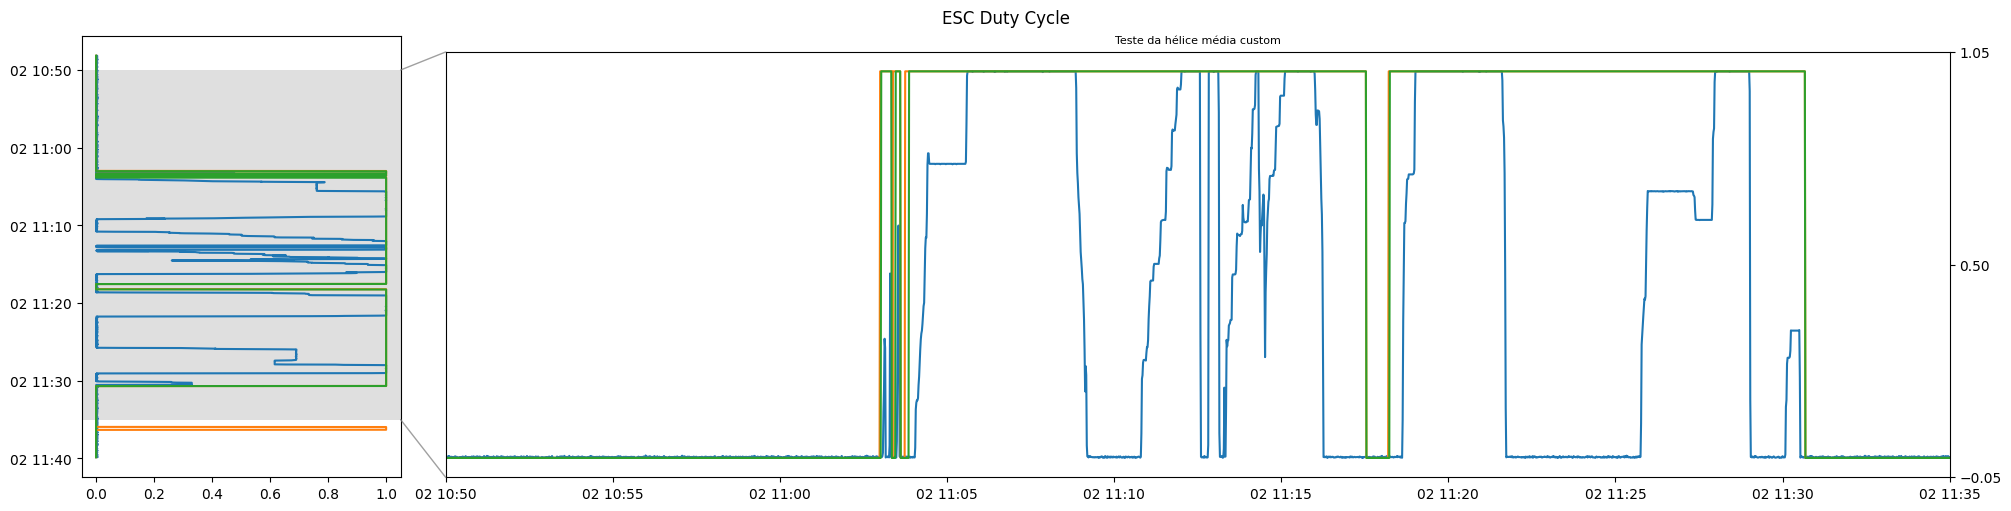

In [44]:
plot_events_data(
    plt.figure(figsize=(20, 5), constrained_layout=True),
    events,
    df,
    ["esc_dt", "boat_on", "motor_on"],
    "ESC Duty Cycle",
)
plt.show()

# plot_events_data(
#     plt.figure(figsize=(10, 10), constrained_layout=True),
#     events,
#     df,
#     ["motor_rpm"],
#     "Motor RPM",
# )

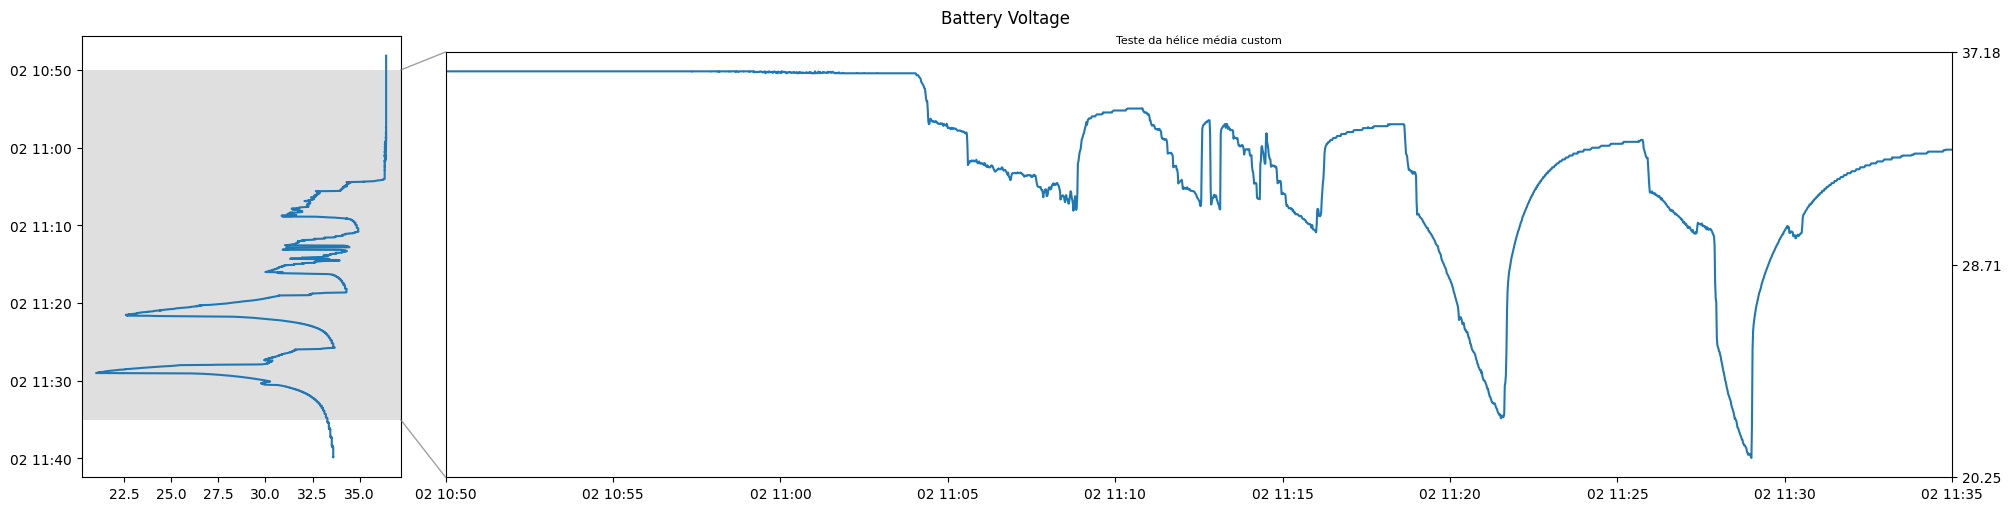

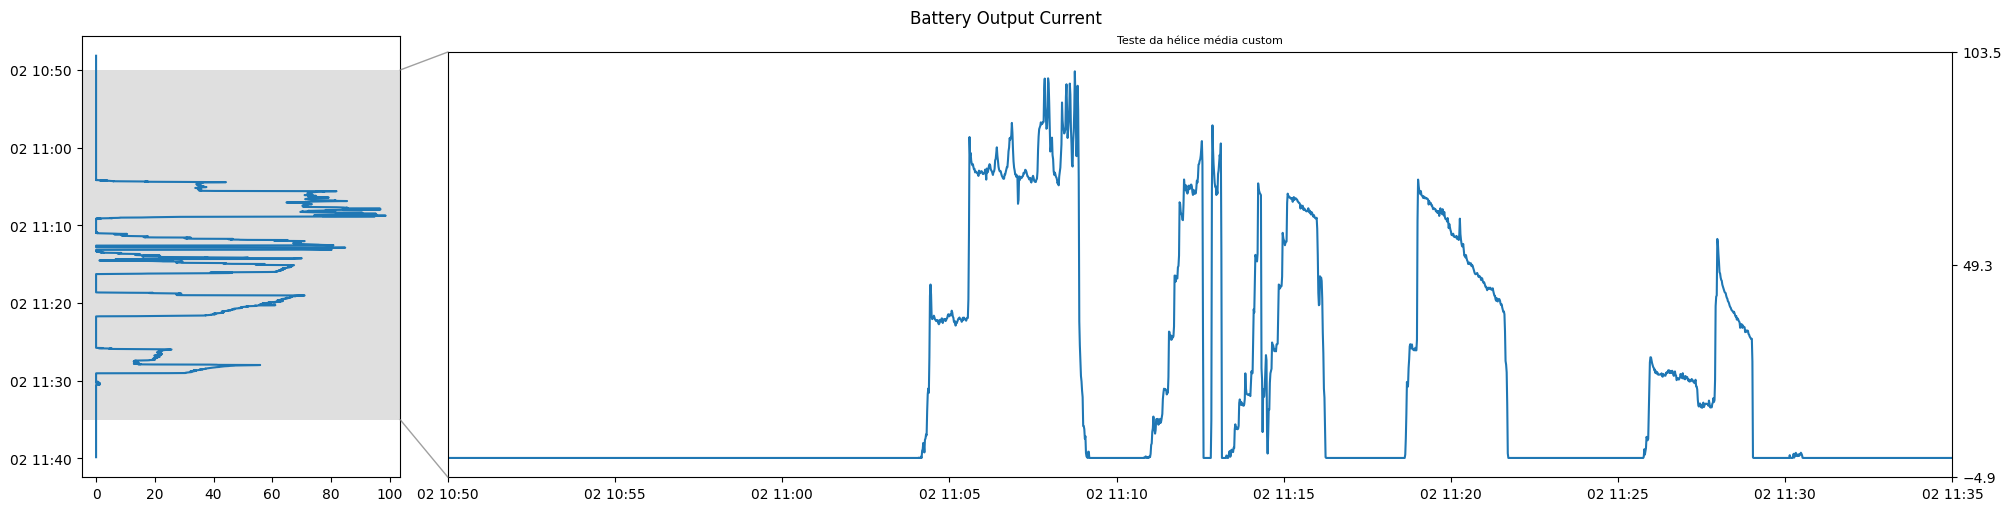

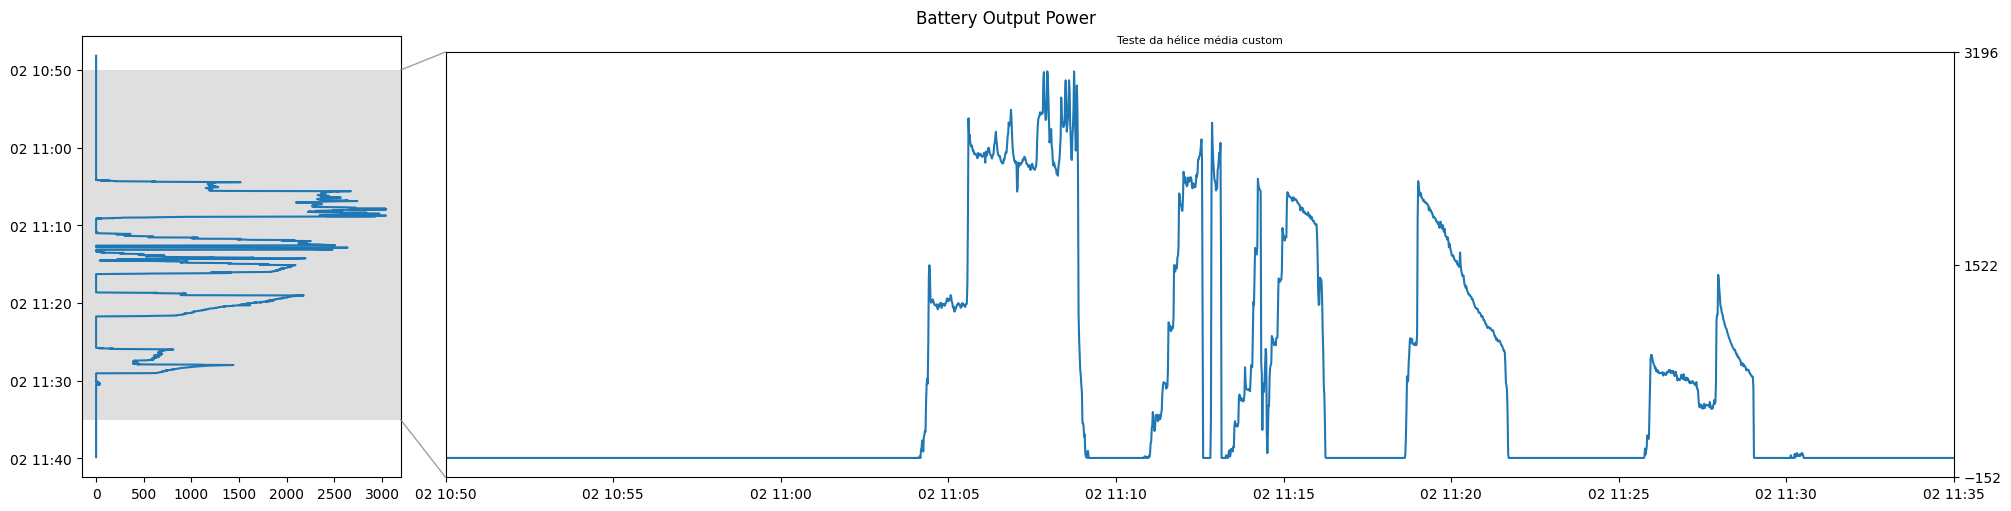

In [45]:
plot_events_data(
    plt.figure(figsize=(20, 5), constrained_layout=True),
    events,
    df,
    ["batt_v"],
    "Battery Voltage",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(20, 5), constrained_layout=True),
    events,
    df,
    ["batt_io"],
    "Battery Output Current",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(20, 5), constrained_layout=True),
    events,
    df,
    ["batt_po"],
    "Battery Output Power",
)
plt.show()


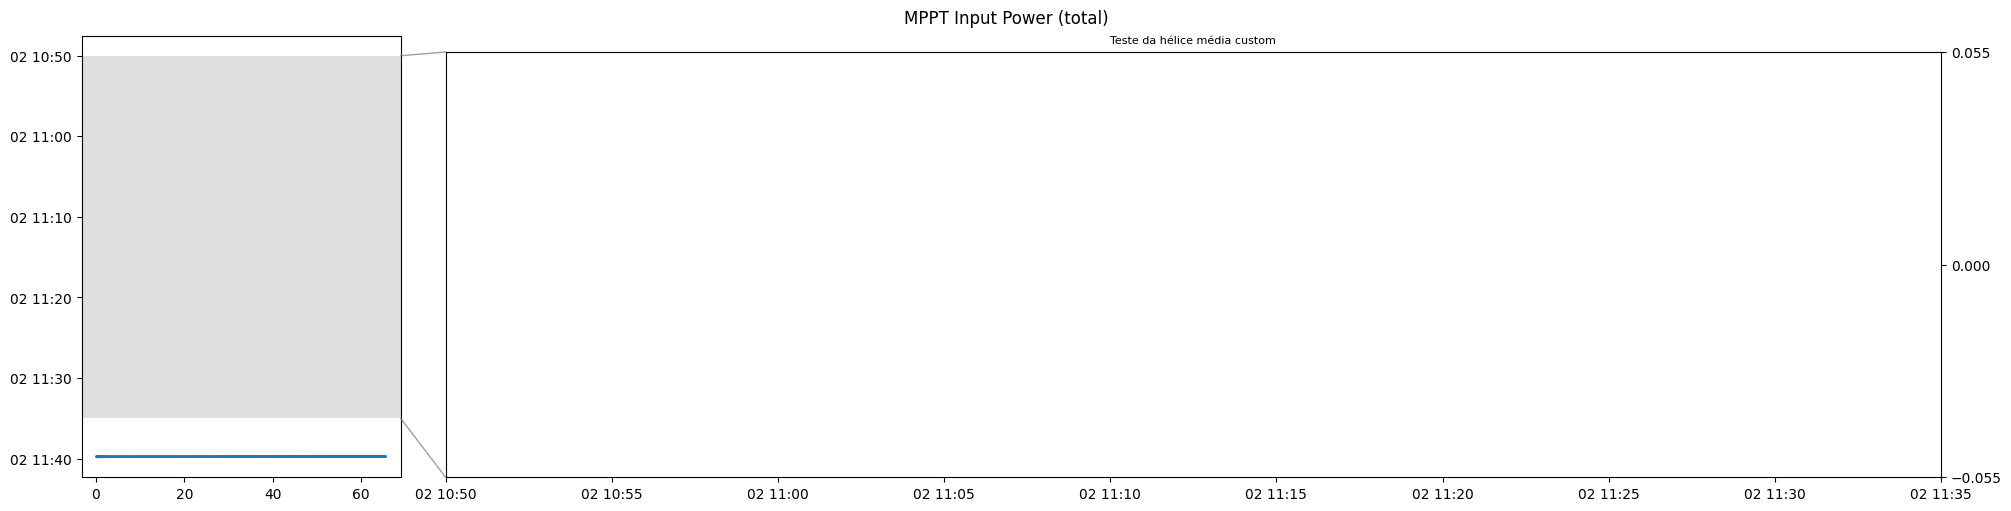

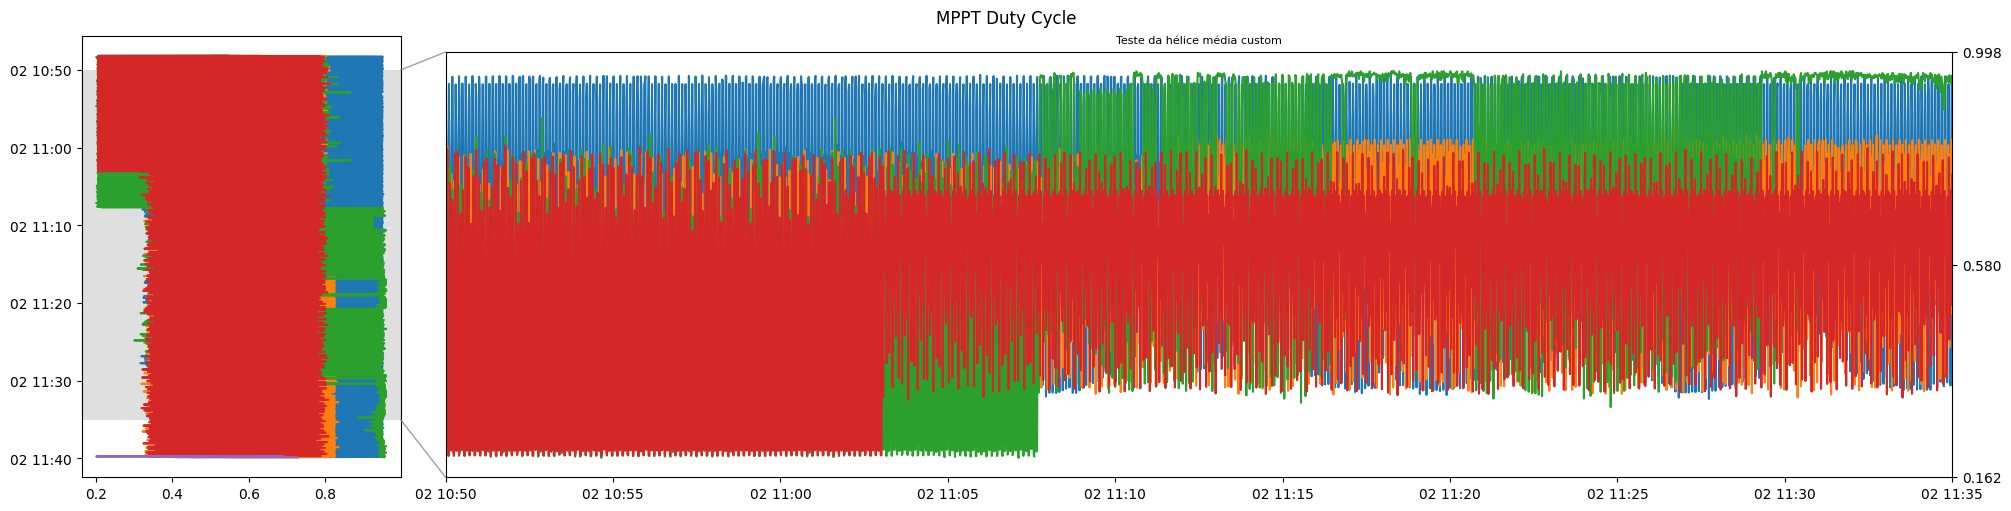

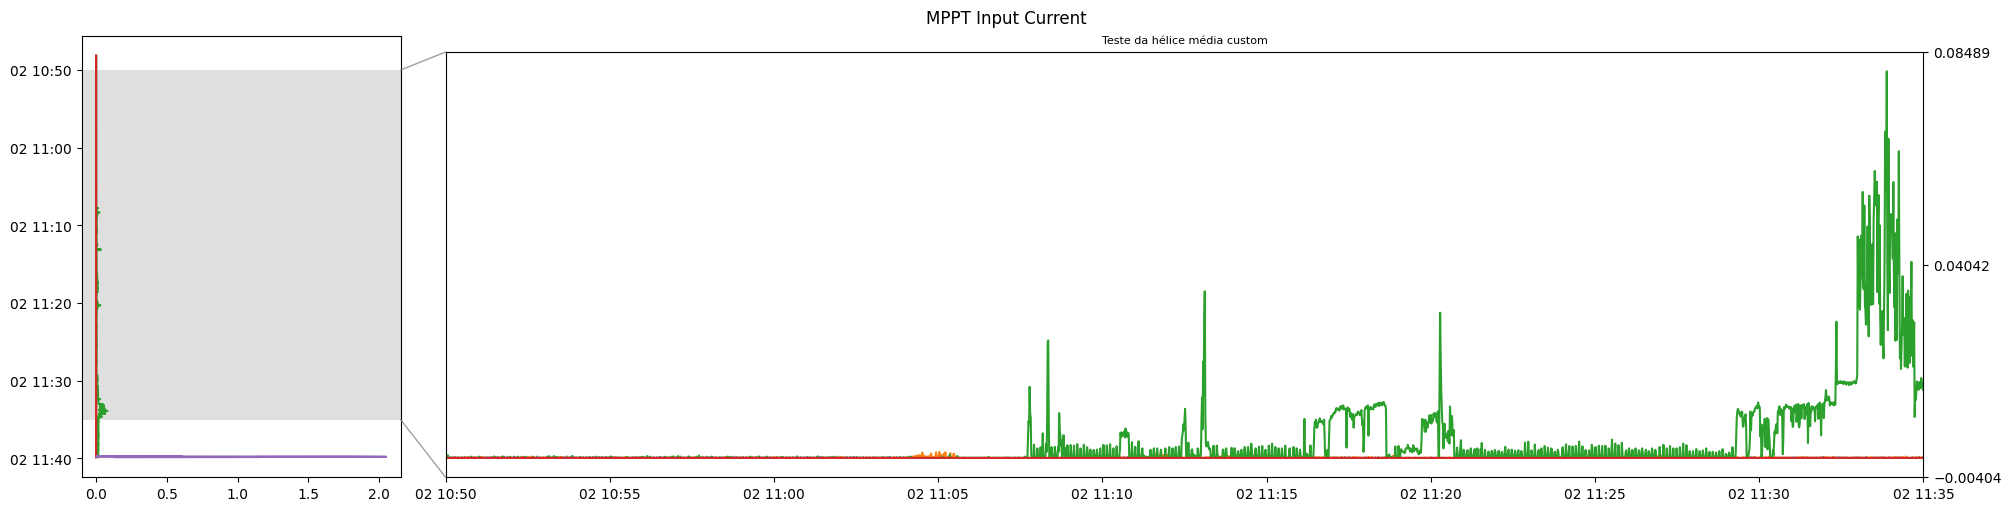

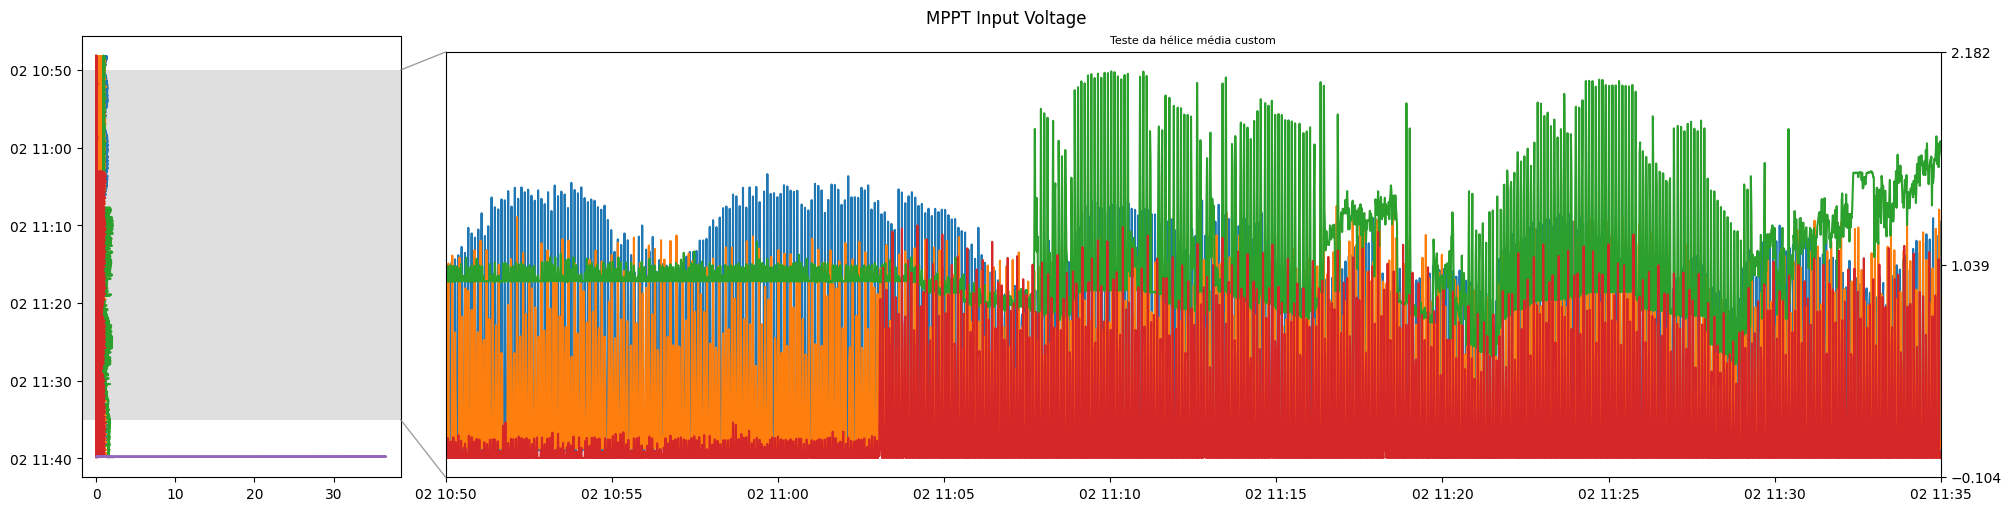

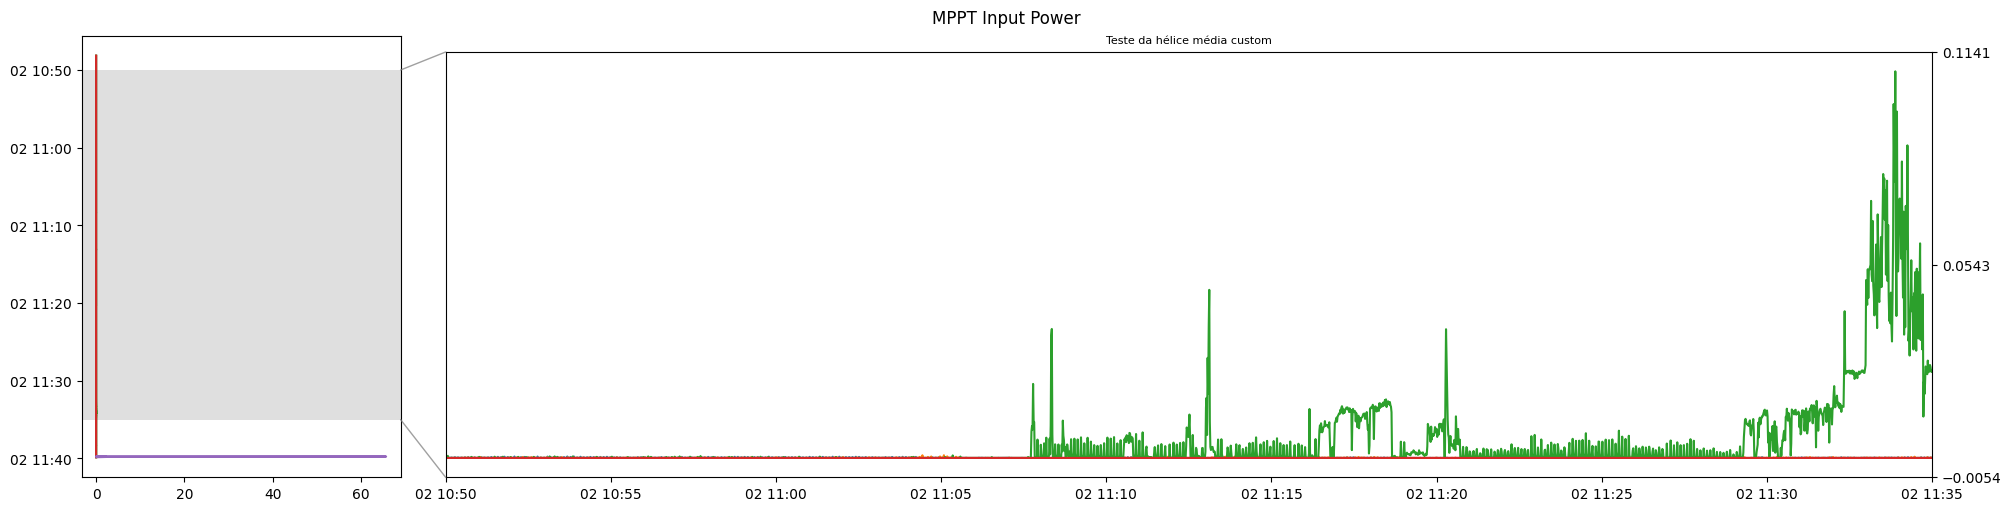

In [46]:
plot_events_data(
    plt.figure(figsize=(20, 5), constrained_layout=True),
    events,
    df,
    # ["mppt_p_in", "solcast_poa"],
    ["mppt_p_in"],
    "MPPT Input Power (total)",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(20, 5), constrained_layout=True),
    events,
    df,
    ["mppt1_dt", "mppt2_dt", "mppt3_dt", "mppt4_dt", "mppt5_dt"],
    "MPPT Duty Cycle",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(20, 5), constrained_layout=True),
    events,
    df,
    ["mppt1_ii", "mppt2_ii", "mppt3_ii", "mppt4_ii", "mppt5_ii"],
    "MPPT Input Current",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(20, 5), constrained_layout=True),
    events,
    df,
    ["mppt1_vi", "mppt2_vi", "mppt3_vi", "mppt4_vi", "mppt5_vi"],
    "MPPT Input Voltage",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(20, 5), constrained_layout=True),
    events,
    df,
    ["mppt1_pi", "mppt2_pi", "mppt3_pi", "mppt4_pi", "mppt5_pi"],
    "MPPT Input Power",
)
plt.show()


In [47]:
# def solve_mcbs(df):
#     df["mcb_po"] = np.zeros(len(df))
#     for i in range(len(system_data["MCB Output Voltage"])):
#         df[f"mcb{i + 1}_v_in"] = df[system_data["MCB Input Voltage"][i]]
#         df[f"mcb{i + 1}_v_out"] = df[system_data["MCB Output Voltage"][i]]
#         df[f"mcb{i + 1}_i_out"] = df[system_data["MCB Output Current"][i]]
#         df[f"mcb{i + 1}_dt"] = df[system_data["MCB Duty Cycle"][i]]

#         df[f"mcb{i + 1}_p_out"] = df[f"mcb{i + 1}_i_out"] * df[f"mcb{i + 1}_v_out"]

#         df["mcb_po"] = df["mcb_po"] + df[f"mcb{i + 1}_p_out"]
#     return df


# solve_mcbs(df)

# plot_events_data(
#     plt.figure(figsize=(10, 10), constrained_layout=True),
#     events,
#     df,
#     ["mcb1_vi", "mcb2_vi"],
#     "MCB Input Voltage",
# )
# plt.show()

# plot_events_data(
#     plt.figure(figsize=(10, 10), constrained_layout=True),
#     events,
#     df,
#     ["mcb1_dt", "mcb2_dt"],
#     "MCB Duty Cycle",
# )
# plt.show()

# plot_events_data(
#     plt.figure(figsize=(10, 10), constrained_layout=True),
#     events,
#     df,
#     ["mcb1_io", "mcb2_io"],
#     "MCB Output Current",
# )
# plt.show()

# plot_events_data(
#     plt.figure(figsize=(10, 10), constrained_layout=True),
#     events,
#     df,
#     ["mcb1_vo", "mcb2_vo"],
#     "MCB Output Voltage",
# )
# plt.show()

# plot_events_data(
#     plt.figure(figsize=(10, 10), constrained_layout=True),
#     events,
#     df,
#     ["mcb1_po", "mcb2_po"],
#     "MCB Output Power",
# )
# plt.show()

# plot_events_data(
#     plt.figure(figsize=(10, 10), constrained_layout=True),
#     events,
#     df,
#     ["mcb_po"],
#     "MCB Output Power (total)",
# )
# plt.show()


## Remove raw data columns


In [48]:
cols_to_keep = [
    "batt_ii",
    "batt_io",
    "batt_i",
    "batt_pi",
    "batt_p",
    "batt_po",
    "batt_v",
    # "bat1_v",
    # "bat2_v",
    # "bat3_v",
    "boat_on",
    "dms_on",
    "esc_dt",
    "esc_i_in",
    # "esc_p_in",
    # "esc_p_out",
    "esc_vi",
    # "esc_vo", TODO
    # "mcb_po",
    # "mcb1_dt",
    # "mcb1_io",
    # "mcb1_po",
    # "mcb1_vi",
    # "mcb1_vo",
    # "mcb2_dt",
    # "mcb2_io",
    # "mcb2_po",
    # "mcb2_vi",
    # "mcb2_vo",
    # "motor_ii", TODO
    "motor_on",
    # "motor_p_in",
    # "motor_p_out",
    # "motor_rpm",
    # "motor_torq",
    # "motor_vi", TODO
    "mppt_i_out",
    "mppt_p_in",
    "mppt_p_out",
    "mppt_v_out",
    "mppt1_dt",
    "mppt1_ii",
    # "mppt1_io", TODO
    "mppt1_pi",
    # "mppt1_po", TODO
    "mppt1_vi",
    "mppt1_vo",
    "mppt2_dt",
    "mppt2_ii",
    # "mppt2_io", TODO
    "mppt2_pi",
    # "mppt2_po", TODO
    "mppt2_vi",
    "mppt2_vo",
    "mppt3_dt",
    "mppt3_ii",
    # "mppt3_io", TODO
    "mppt3_pi",
    # "mppt3_po", TODO
    "mppt3_vi",
    "mppt3_vo",
    "mppt4_dt",
    "mppt4_ii",
    # "mppt4_io", TODO
    "mppt4_pi",
    # "mppt4_po", TODO
    "mppt4_vi",
    "mppt4_vo",
    # "prop_p_in",
    # "prop_p_out", TODO
    # "prop_rpm",
    # "prop_torq",
    # "solcast_AirTemp",
    # "solcast_energy",
    # "solcast_poa",
    "timestamp",
    # "trans_p_in",
    # "trans_p_out",
    # "trans_rpmi",
    # "trans_rpmo",
    # "trans_torqi",
    # "trans_torqo",
    "gps_latitude",
    "gps_longitude",
    "gps_altitude",
    "gps_speed",
    "gps_heading",
    "gps_distance",
    "gps_timestamp",
    "steering_wheel_batt_V",
    "steering_wheel_batt_I",
    "steering_wheel_batt_P",
    "steering_wheel_pos",
    
]
df = df[cols_to_keep]

# df.to_csv("models/2022/boat_data_1s.csv")


## Statistics


In [49]:
for event in events:
    df_sel = df[(df["timestamp"] >= event["start"]) & (df["timestamp"] <= event["end"])]

    print("-" * 80, end="\n\n")
    print("Event:", event["name"], end="\n\n")
    print(df_sel.describe().transpose()[["mean", "std", "min", "max"]])


--------------------------------------------------------------------------------

Event: Teste da hélice média custom

                              mean         std         min          max
batt_ii                3.783222e+00    2.860143    0.000000     7.691406
batt_io                1.632677e+01   26.338451    0.000000    98.604164
batt_i                 1.254354e+01   28.729050   -7.691406    98.604164
batt_pi                1.309119e+02   99.674728    0.000000   278.813751
batt_p                 3.681524e+02  899.539062 -278.813751  3043.987305
batt_po                4.990644e+02  817.709473    0.000000  3043.987305
batt_v                 3.316142e+01    3.250284   21.017225    36.405949
esc_dt                3.109925e-01    0.420151    0.000000     1.000000
esc_i_in                         NaN         NaN         NaN          NaN
esc_vi                3.316142e+01    3.250284   21.017225    36.405949
mppt_i_out                        NaN         NaN         NaN          NaN
mppt_

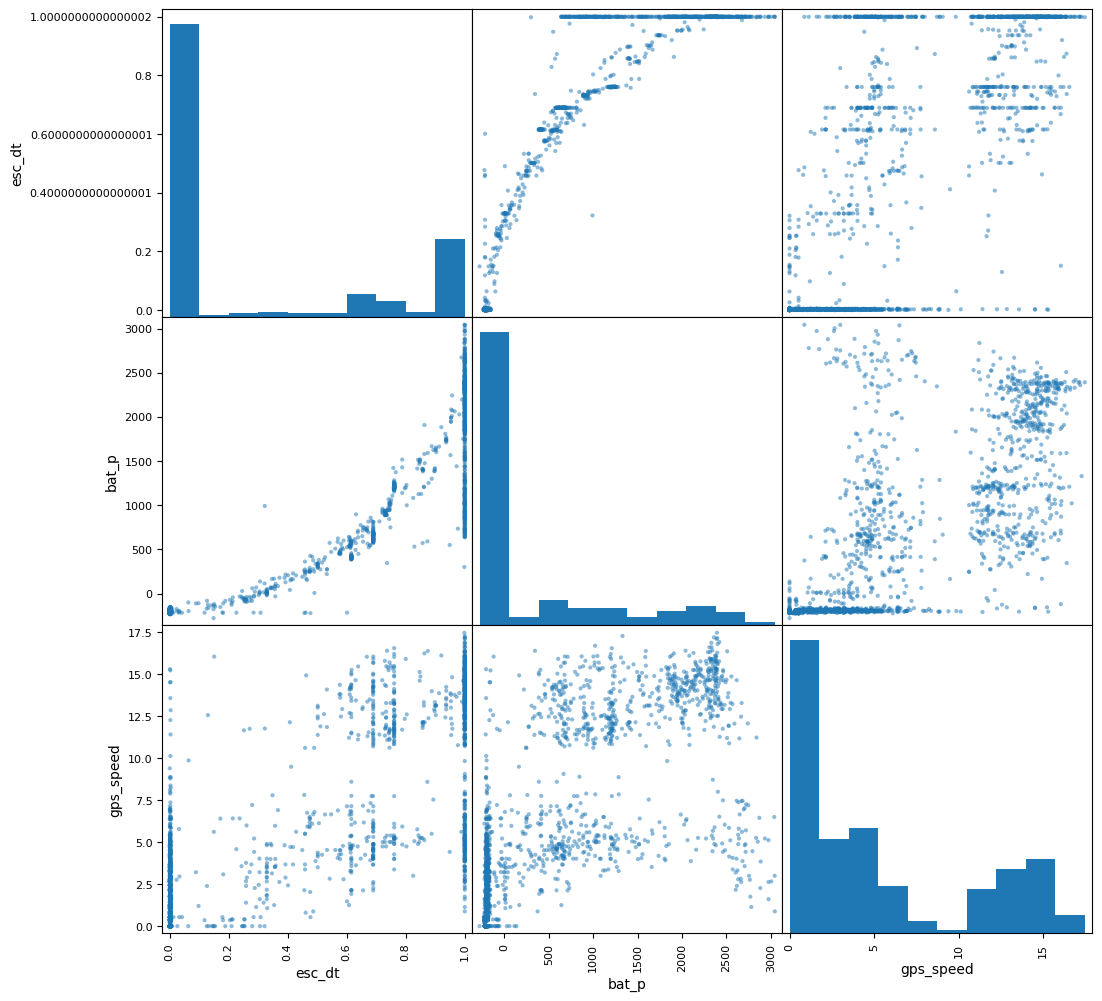

In [50]:
from pandas.plotting import scatter_matrix

scatter_matrix(
    df[
        [
            "esc_dt",
            # "mppt_p_in",
            # "batt_v",
            "batt_p",
            "gps_speed",
        ]
    ],
    figsize=(12, 12),
)
plt.show()


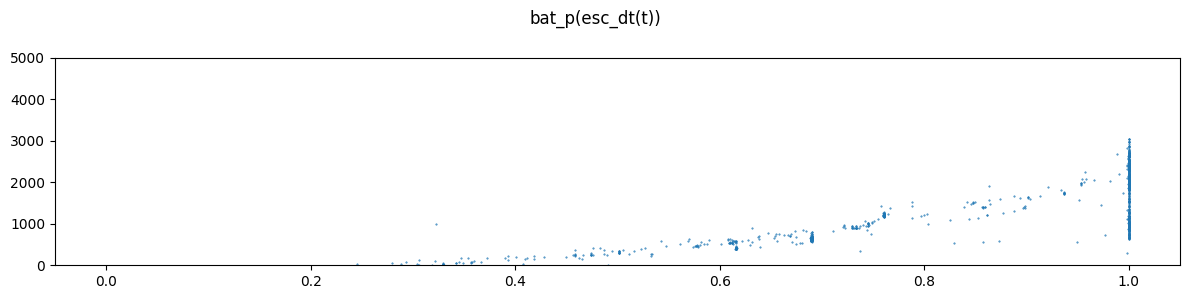

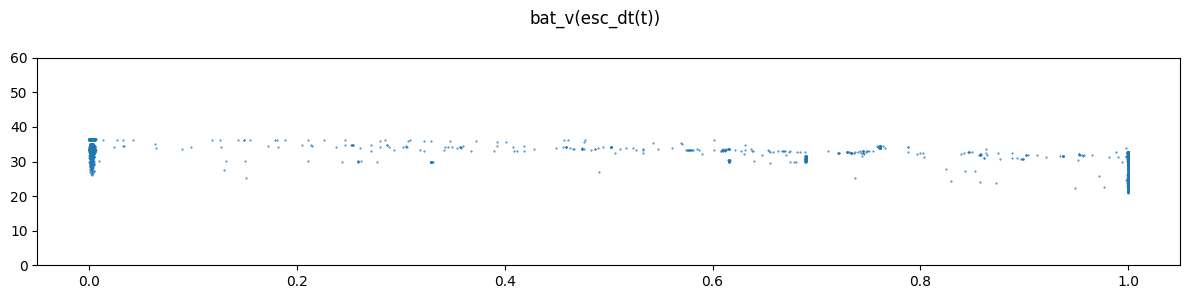

In [51]:
plt.figure(figsize=(12, 3))
plt.suptitle("batt_p(esc_dt(t))")
plt.scatter(df["esc_dt"], df["batt_p"], s=0.2)
plt.ylim([0, 5000])
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 3))
plt.suptitle("batt_v(esc_dt(t))")
plt.scatter(df["esc_dt"], df["batt_v"], s=0.2)
plt.ylim([0, 60])
plt.tight_layout()
plt.show()

# plt.figure(figsize=(12, 3))
# plt.suptitle("motor_rpm(esc_dt(t))")
# plt.scatter(df["esc_dt"], df["motor_rpm"], s=0.2)
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(12, 3))
# plt.suptitle("prop_p_in(esc_p_in(t)) (modelled data)")
# plt.scatter(df["esc_p_in"], df["prop_p_in"], s=0.2)
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(12, 3))
# plt.suptitle("mppt_p_in(solcast_poa(t))")
# plt.scatter(df["solcast_poa"], df["mppt_p_in"], s=0.2)
# plt.tight_layout()
# plt.show()


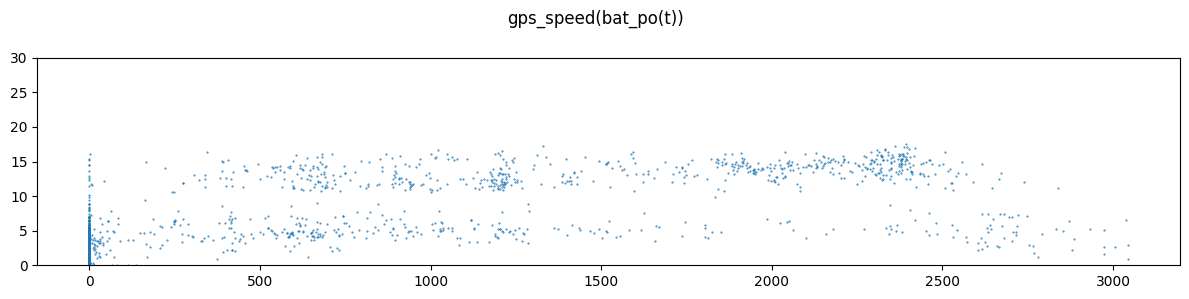

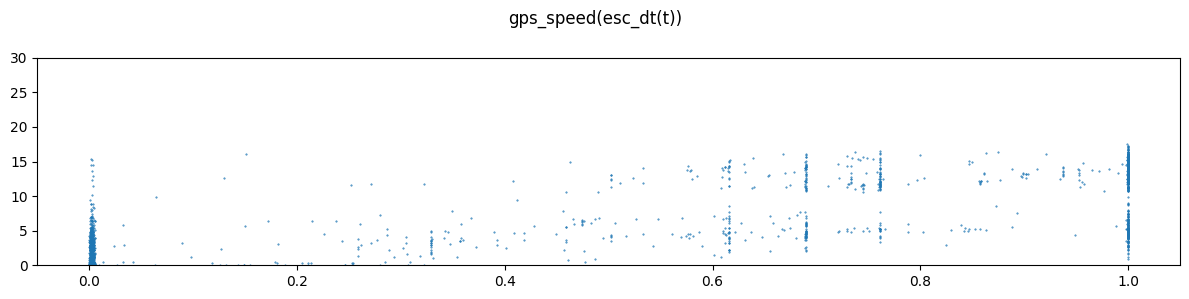

In [52]:
plt.figure(figsize=(12, 3))
plt.suptitle("gps_speed(batt_po(t))")
plt.scatter(df["batt_po"], df["gps_speed"], s=0.2)
plt.ylim([0, 30])
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 3))
plt.suptitle("gps_speed(esc_dt(t))")
plt.scatter(df["esc_dt"], df["gps_speed"], s=0.2)
plt.ylim([0, 30])
plt.tight_layout()
plt.show()

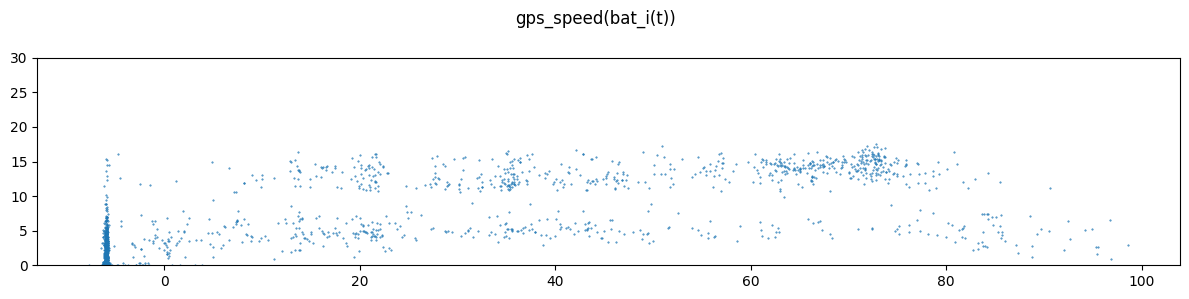

In [59]:


plt.figure(figsize=(12, 3))
plt.suptitle("gps_speed(batt_i(t))")
plt.scatter(df["batt_i"], df["gps_speed"], s=0.2)
plt.ylim([0, 30])
plt.tight_layout()
plt.show()


ValueError: Argument Z must be 2-dimensional.

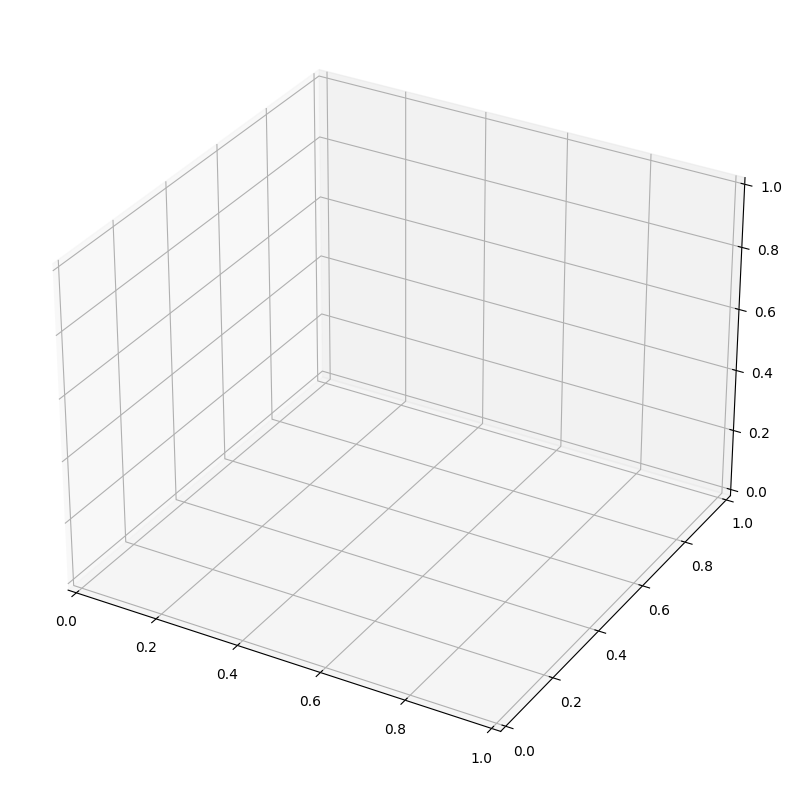

In [78]:
# Create a 3D plot figure and axis
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

x, y, z = ["gps_speed", "batt_v", "batt_i"]

X, Y = np.meshgrid(df[x], df[y])
Z = df[z].to_numpy().reshape((len(df[y]), len(df[x])))

# Plot the surface
ax.plot_surface(X, Y, Z, cmap ='viridis', edgecolor ='orange')
# ax.plot_trisurf(df[x], df[y], df[z], cmap='viridis')
# ax.scatter(df[x], df[y], df[z], marker='o')

# Set labels and title
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)

# Show the plot
plt.tight_layout()
plt.show()
